In [1]:
import numpy as np
from scipy.io import loadmat
import pysindy as ps
import matplotlib.pyplot as plt
import pandas as pd

from pysindy.differentiation import SpectralDerivative

from pysindy.differentiation.finite_difference import FiniteDifference
from pysindy.differentiation import FiniteDifference

from pysindy.optimizers import SR3
plt.style.use('ggplot')
import os

In [2]:
cnoidal_paths=['data_cnoidal/'+c for c in os.listdir('data_cnoidal')]

In [3]:
path=cnoidal_paths[0]
def run_sindy(path):
    print(path)
    data_raw=pd.read_csv(path)

    data_raw.columns=['data']

    data_raw['fx']=data_raw['data'].apply(lambda x:x.strip().split('  ')[1])
    data_raw['x']=data_raw['data'].apply(lambda x:x.strip().split('  ')[0])
    data=np.array(data_raw[['x','fx']].copy().astype('float'))


    f=data[:,1]
    x=np.linspace(-np.pi,np.pi,len(f))
    order=2
    sd1=FiniteDifference(d=1,order=order)
    sd2=FiniteDifference(d=2,order=order)
    sd3=FiniteDifference(d=3,order=order)

    fd1=sd1._differentiate(f,x)
    fd2=sd2._differentiate(f,x)

    F=np.vstack([f,fd1,fd2]).T

    model = ps.SINDy(
        feature_names=["u","ux","uxx"],
        optimizer=ps.optimizers.STLSQ(threshold=0.01,alpha=0.01),
        feature_library=ps.PolynomialLibrary(degree=2),
    )
    model.fit(F, t=x)
    main_equation="uxxx = "+model.equations()[2]
    
    sim=model.simulate(x0=F[0],t=x)
    plt.figure(figsize=(8,6))
    plt.plot(x,sim[:,0],label='Simulated Reconstruction',lw=4,alpha=0.7)
    plt.plot(x,F[:,0],label='Input Data')
    plt.xlabel(main_equation,fontsize=14)
    plt.title(path.split('/')[1].split('.')[0])
    plt.legend()
    save_path="results/"+path.split('/')[1].split('.')[0]+"_simulation_plot.png"
    data_tag=path.split('/')[1].split('.')[0]
    plt.savefig(save_path)    
    return main_equation,data_tag

data_cnoidal/cnoidal05_05_1.txt
data_cnoidal/cnoidal05_01_1.txt
data_cnoidal/cnoidal05_2_1.txt


/Users/owlx/opt/anaconda3/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


data_cnoidal/cnoidal075_1_1.txt
data_cnoidal/cnoidal05_1_5.txt
data_cnoidal/cnoidal075_01_0.txt
data_cnoidal/cnoidal05_1_1.txt


/Users/owlx/opt/anaconda3/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


data_cnoidal/cnoidal05_1_10.txt
data_cnoidal/cnoidal025_1_1.txt
data_cnoidal/cnoidal05_1_05.txt
data_cnoidal/cnoidal05_1_01.txt
data_cnoidal/cnoidal05_10_1.txt


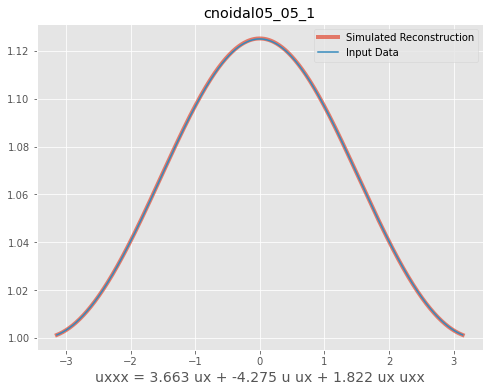

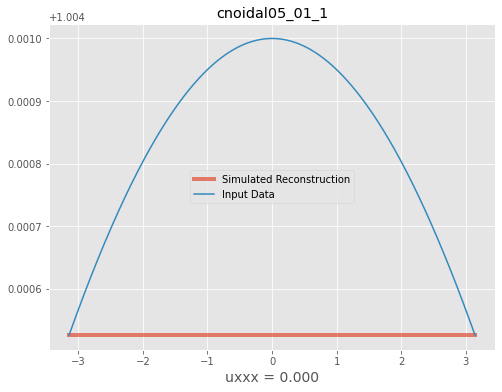

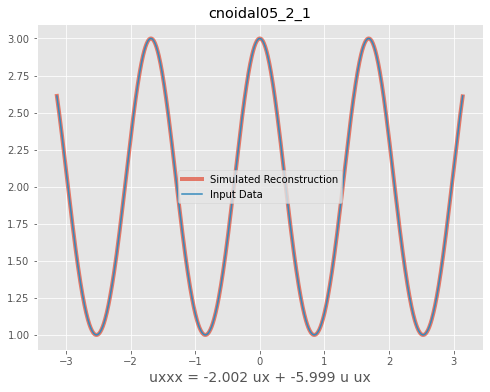

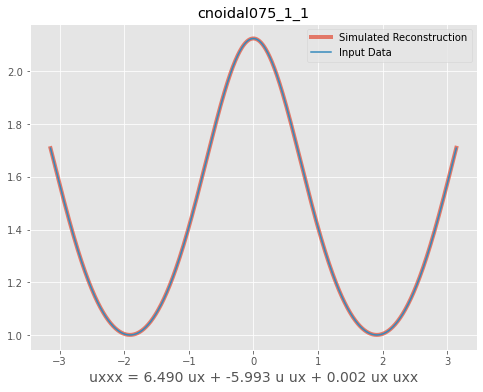

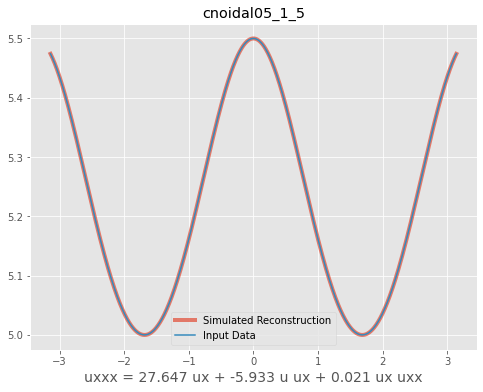

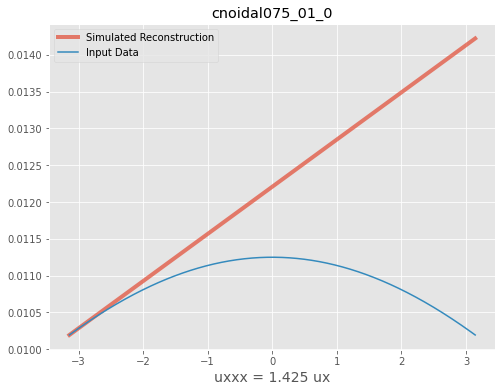

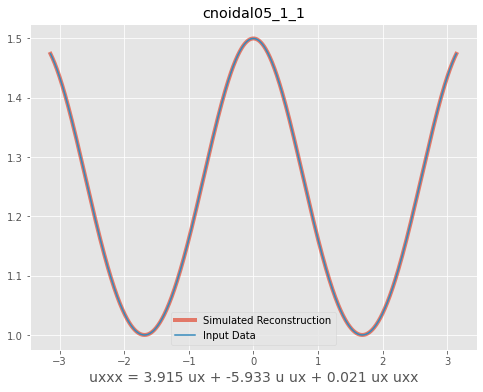

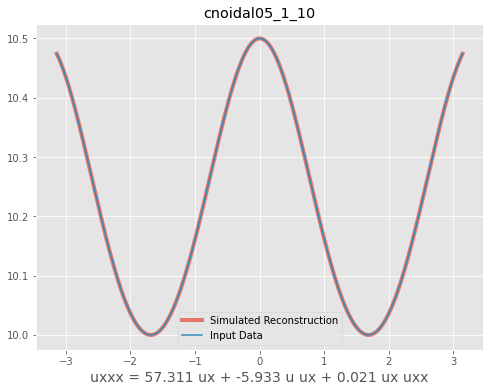

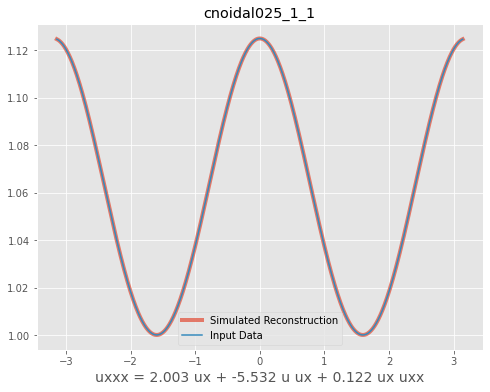

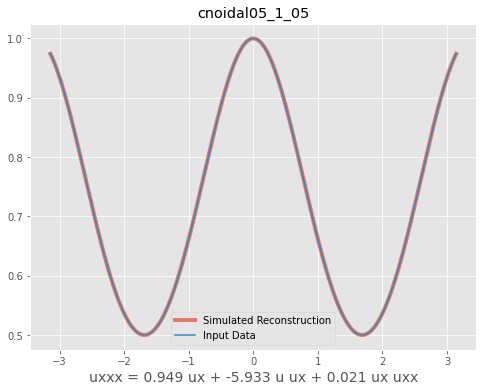

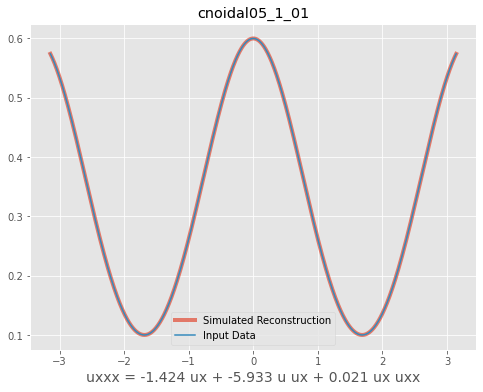

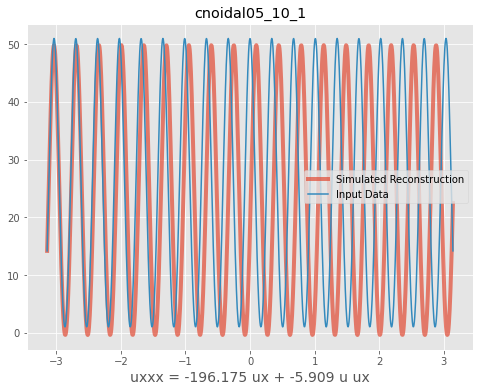

In [4]:
results = [run_sindy(path) for path in cnoidal_paths]

In [160]:
for r in results:
    print(r[1].ljust(15),'    ',r[0])

cnoidal05_05_1       uxxx = 3.663 ux + -4.275 u ux + 1.822 ux uxx
cnoidal05_01_1       uxxx = 0.000
cnoidal05_2_1        uxxx = -2.002 ux + -5.999 u ux
cnoidal075_1_1       uxxx = 6.490 ux + -5.993 u ux + 0.002 ux uxx
cnoidal05_1_5        uxxx = 27.647 ux + -5.933 u ux + 0.021 ux uxx
cnoidal075_01_0      uxxx = 1.425 ux
cnoidal05_1_1        uxxx = 3.915 ux + -5.933 u ux + 0.021 ux uxx
cnoidal05_1_10       uxxx = 57.311 ux + -5.933 u ux + 0.021 ux uxx
cnoidal025_1_1       uxxx = 2.003 ux + -5.532 u ux + 0.122 ux uxx
cnoidal05_1_05       uxxx = 0.949 ux + -5.933 u ux + 0.021 ux uxx
cnoidal05_1_01       uxxx = -1.424 ux + -5.933 u ux + 0.021 ux uxx
cnoidal05_10_1       uxxx = -196.175 ux + -5.909 u ux


In [15]:
figure_paths=list(np.array(cnoidal_paths)[[2,10,11,3]])

In [18]:
def run_sindy(path):
    print(path)
    data_raw=pd.read_csv(path)

    data_raw.columns=['data']

    data_raw['fx']=data_raw['data'].apply(lambda x:x.strip().split('  ')[1])
    data_raw['x']=data_raw['data'].apply(lambda x:x.strip().split('  ')[0])
    data=np.array(data_raw[['x','fx']].copy().astype('float'))


    f=data[:,1]
    x=np.linspace(-np.pi,np.pi,len(f))
    order=2
    sd1=FiniteDifference(d=1,order=order)
    sd2=FiniteDifference(d=2,order=order)
    sd3=FiniteDifference(d=3,order=order)

    fd1=sd1._differentiate(f,x)
    fd2=sd2._differentiate(f,x)

    F=np.vstack([f,fd1,fd2]).T

    model = ps.SINDy(
        feature_names=["u","ux","uxx"],
        optimizer=ps.optimizers.STLSQ(threshold=0.01,alpha=0.01),
        feature_library=ps.PolynomialLibrary(degree=2),
    )
    model.fit(F, t=x)
    main_equation="uxxx = "+model.equations()[2]
    
    sim=model.simulate(x0=F[0],t=x)
    plt.figure(figsize=(8,6))
    plt.plot(x,sim[:,0],label='Simulated Reconstruction',lw=4,alpha=0.7)
    plt.plot(x,F[:,0],label='Input Data')
    plt.xlabel(main_equation,fontsize=14)
    plt.title(path.split('/')[1].split('.')[0])
    plt.legend(loc='upper right')
    save_path="results_remake/"+path.split('/')[1].split('.')[0]+"_simulation_plot.png"
    data_tag=path.split('/')[1].split('.')[0]
    plt.savefig(save_path)    
    return main_equation,data_tag

data_cnoidal/cnoidal05_2_1.txt
data_cnoidal/cnoidal05_1_01.txt
data_cnoidal/cnoidal05_10_1.txt
data_cnoidal/cnoidal075_1_1.txt


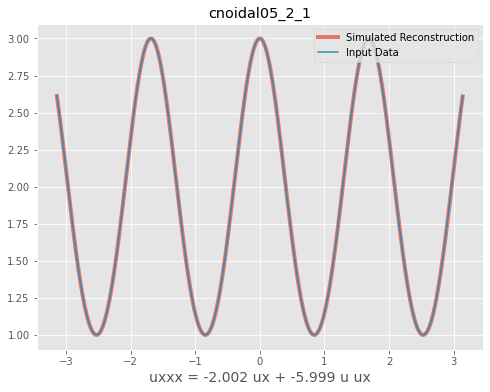

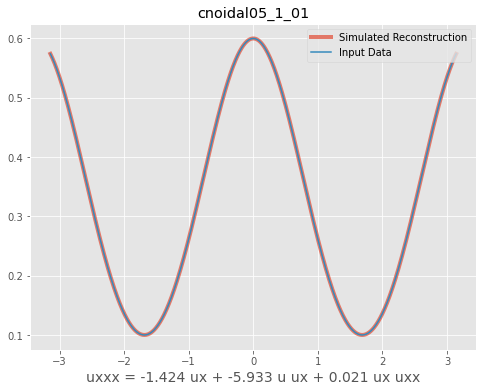

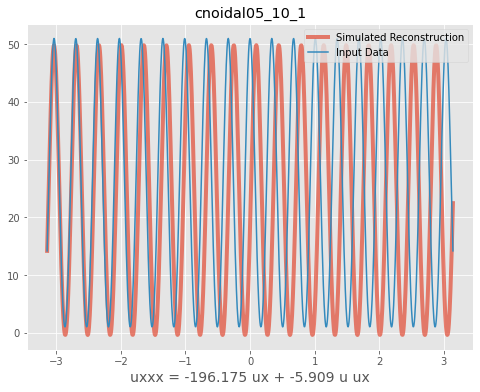

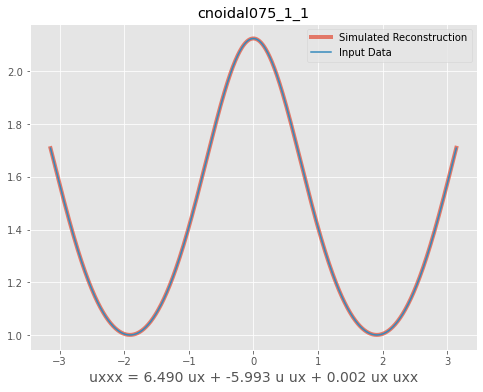

In [19]:
results = [run_sindy(path) for path in figure_paths]